# RANSAC Example
## General problem
y = m x + c

y0 = m x0 + c

y1 = m x1 + c

y2 = m x2 + c

y3 = m x3 + c

equivalent to A p = y

with

A = [x0 1

    x1 1

    x2 1

    x3 1]

p = [m

    c]

# Imports

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng(1)

# Generate some data
Lets generate some data on a line with 100 noisy inliers and 25 outliers

In [2]:
n_samples = 100
samples_mean = 20
samples_std = 5
noise_std = 1
noise_mean = 0
n_outliers = 25
outliers_x_mean = 20
outliers_x_std = 10
outliers_y_mean = 10
outliers_y_std = 5

m = 0.5
c = 1

inliers_x = rng.standard_normal(n_samples) * samples_std + samples_mean
inliers_y = m * inliers_x + c
noise = rng.standard_normal(n_samples) * noise_std + noise_mean
y = inliers_y + noise

outliers_x = rng.standard_normal(n_outliers)*outliers_x_std + outliers_x_mean
outliers_y = rng.standard_normal(n_outliers)*outliers_y_std + outliers_y_mean

print("True coeficients:{} {}".format(m, c))
print("Inliers:", n_samples)
print("Outliers:", n_outliers)

True coeficients:0.5 1
Inliers: 100
Outliers: 25


# Plot the Data

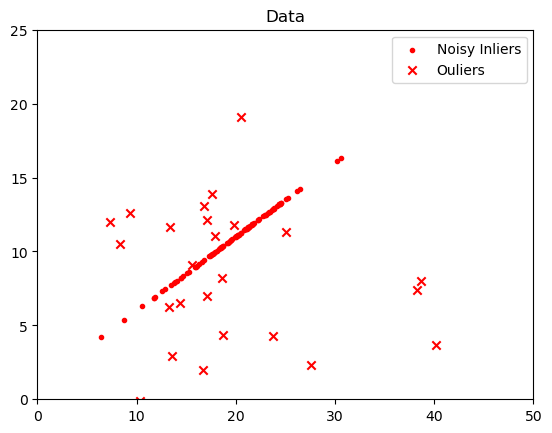

In [3]:
plt.title("Data")
plt.scatter(inliers_x, inliers_y, c='r', marker='.', label='Noisy Inliers')
plt.scatter(outliers_x, outliers_y, c='r', marker='x', label='Ouliers')
plt.xlim([0, 50])
plt.ylim([0, 25])
plt.legend()

# Estimate parameters with regular Least Squares

In [4]:
x = np.hstack([inliers_x, outliers_x])
y = np.hstack([inliers_y, outliers_y])
A = np.vstack([x, np.ones(len(x))]).T
solution, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)  # rcond=None is to silence the warning
m_est, c_est = solution
y_est = m_est * x + c_est
print("Estimated coefficients (Numpy Least Squares):{} {}".format(m_est, c_est))


Estimated coefficients (Numpy Least Squares):0.20270330489573724 6.378154648307231


# Plot the solution with Least Squares

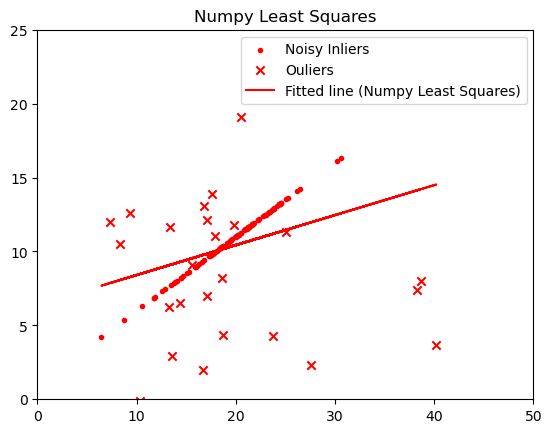

In [5]:
plt.title("Numpy Least Squares")
plt.scatter(inliers_x, inliers_y, c='r', marker='.', label='Noisy Inliers')
plt.scatter(outliers_x, outliers_y, c='r', marker='x', label='Ouliers')
plt.plot(x, y_est, 'r', label='Fitted line (Numpy Least Squares)')
plt.xlim([0, 50])
plt.ylim([0, 25])
plt.legend()

# Estimate parameters with Linear Regression

In [6]:
lr_model = linear_model.LinearRegression()
x = x.reshape((len(x), 1))
lr_model.fit(x, y)
y_predict = lr_model.predict(x)
print("Estimated coefficients (Scikit-Learn linear regression):{} {}".format(lr_model.coef_[0], lr_model.intercept_))


Estimated coefficients (Scikit-Learn linear regression):0.20270330489573726 6.37815464830723


# Plot the solution with Linear Regression

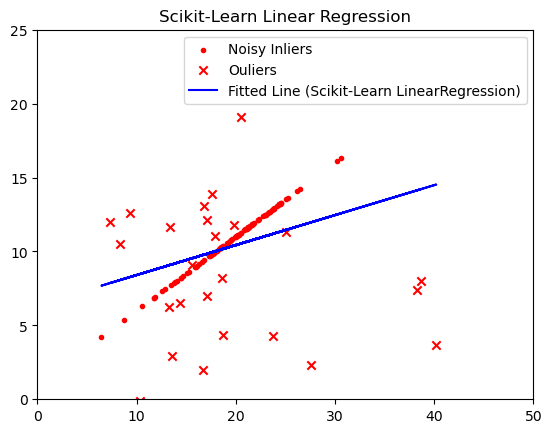

In [7]:
plt.title("Scikit-Learn Linear Regression")
plt.scatter(inliers_x, inliers_y, c='r', marker='.', label='Noisy Inliers')
plt.scatter(outliers_x, outliers_y, c='r', marker='x', label='Ouliers')
plt.plot(x[:, 0], y_predict, c='b', label='Fitted Line (Scikit-Learn LinearRegression)')
plt.xlim([0, 50])
plt.ylim([0, 25])
plt.legend()


# Estimate parameters with RANSAC Regressor

In [8]:
ransac = linear_model.RANSACRegressor()
ransac.fit(x, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print("Estimated coefficients (RANSAC):{} {}".format(ransac.estimator_.coef_[0], ransac.estimator_.intercept_))
print("Identified Inliers:", np.sum(inlier_mask))
print("Identified Outliers:", np.sum(outlier_mask))
y_ransac = ransac.predict(x)

Estimated coefficients (RANSAC):0.5031652617990012 0.9468432906480793
Identified Inliers: 104
Identified Outliers: 21


# Plot the solution with RANSAC Regressor

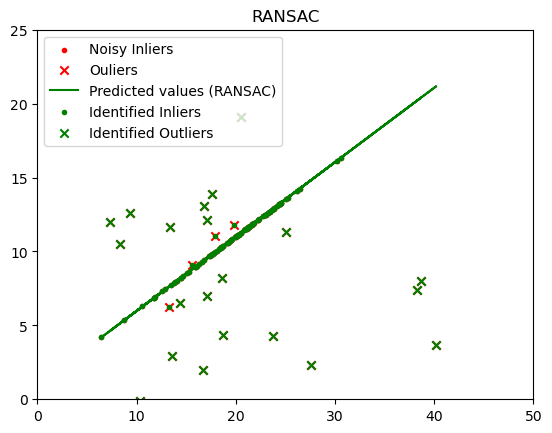

In [9]:
plt.title("RANSAC")
plt.scatter(inliers_x, inliers_y, c='r', marker='.', label='Noisy Inliers')
plt.scatter(outliers_x, outliers_y, c='r', marker='x', label='Ouliers')
plt.plot(x[:, 0], y_ransac, c='g', label='Predicted values (RANSAC)')
plt.scatter(x[inlier_mask, 0], y[inlier_mask], color="g", marker=".", label="Identified Inliers")
plt.scatter(x[outlier_mask, 0], y[outlier_mask], color="g", marker="x", label="Identified Outliers")
plt.xlim([0, 50])
plt.ylim([0, 25])
plt.legend()

# Estimate parameters with RANSAC Regressor and threshold = 0.1

In [10]:
ransac = linear_model.RANSACRegressor(residual_threshold=0.1)
ransac.fit(x, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print("Estimated coefficients (RANSAC threshold=0.1):{} {}".format(ransac.estimator_.coef_[0], ransac.estimator_.intercept_))
print("Identified Inliers:", np.sum(inlier_mask))
print("Identified Outliers:", np.sum(outlier_mask))
y_ransac = ransac.predict(x)

Estimated coefficients (RANSAC threshold=0.1):0.49999999999999994 0.9999999999999982
Identified Inliers: 100
Identified Outliers: 25


# Plot the solution with RANSAC Regressor and threshold = 0.1

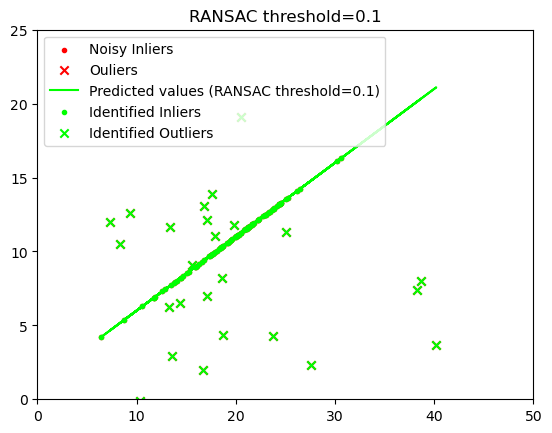

In [11]:
plt.title("RANSAC threshold=0.1")
plt.scatter(inliers_x, inliers_y, c='r', marker='.', label='Noisy Inliers')
plt.scatter(outliers_x, outliers_y, c='r', marker='x', label='Ouliers')
plt.plot(x[:, 0], y_ransac, c='lime', label='Predicted values (RANSAC threshold=0.1)')
plt.scatter(x[inlier_mask, 0], y[inlier_mask], color="lime", marker=".", label="Identified Inliers")
plt.scatter(x[outlier_mask, 0], y[outlier_mask], color="lime", marker="x", label="Identified Outliers")
plt.xlim([0, 50])
plt.ylim([0, 25])
plt.legend()
